In [1]:


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd



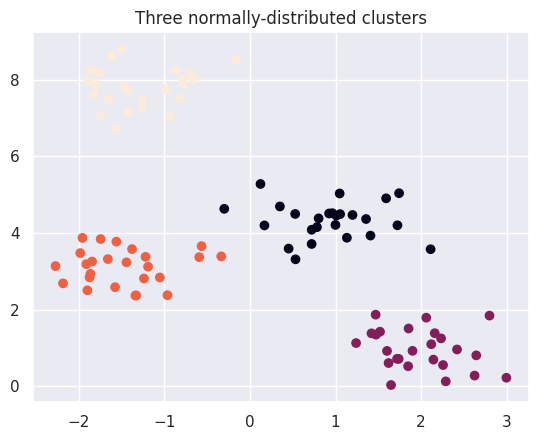

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, cluster_std=0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Three normally-distributed clusters")
plt.show()


,x_axis,y_axis,set_number
0,0.720868,3.713471,0
1,-1.894684,7.968985,3
2,1.356789,4.364625,0
3,1.053744,4.492869,0
4,1.591415,4.904977,0
5,0.782607,4.152636,0
6,-1.957517,3.872915,2
7,-0.773545,7.879236,3
8,0.123135,5.279175,0
9,-1.432847,7.715770,3


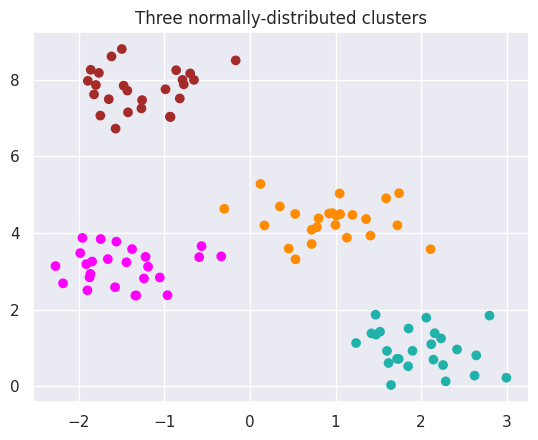

In [28]:
generated_2_sets = pd.DataFrame({'x_axis': X[:, 0], 'y_axis': X[:, 1],'set_number':y})
display( generated_2_sets.head( 10 ) )
cmap4 = colors.ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen", "red", "blue","magenta", "black", "pink", "brown"])
plt.scatter(generated_2_sets['x_axis'], generated_2_sets['y_axis'], c=generated_2_sets['set_number'],cmap=cmap4)
plt.title("Three normally-distributed clusters")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(generated_2_sets[['x_axis','y_axis']], generated_2_sets[['set_number']], test_size=0.33, random_state=0)

from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)



In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)




,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


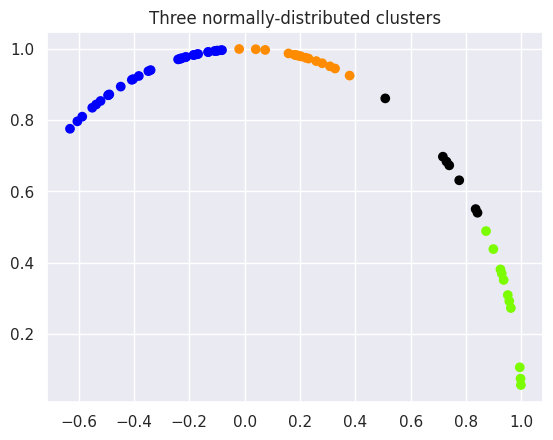

In [6]:
#sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)
plt.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=kmeans.labels_,cmap=cmap4)
plt.title("Three normally-distributed clusters")
plt.show()



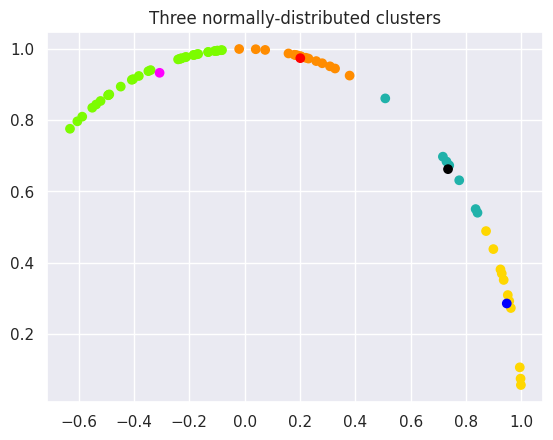

In [7]:
kmeans.cluster_centers_
#clusters_num = [3,4,5]
clusters_num = [4,5,6,7]

clusters = pd.DataFrame({'x_axis':X_train_norm[:, 0],'y_axis':X_train_norm[:, 1],'set_number':kmeans.labels_})
center_sets = pd.DataFrame({'x_axis': kmeans.cluster_centers_[:, 0], 'y_axis': kmeans.cluster_centers_[:, 1],'set_number':clusters_num})

df_res = pd.concat( [clusters, center_sets] )

plt.scatter( df_res['x_axis'], df_res['y_axis'], c=df_res['set_number'],cmap=cmap4)
plt.title("Three normally-distributed clusters")
plt.show()



In [29]:
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans.fit(X_train)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [30]:
ch_index = calinski_harabasz_score(X_train, kmeans.labels_)

print(ch_index)

320.4499218275215


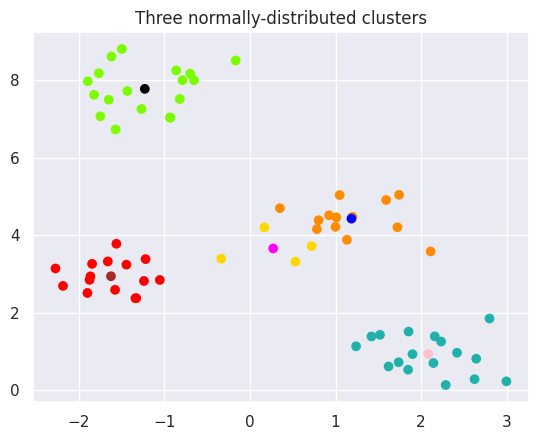

In [31]:
#clusters_num = [3,4,5]
#clusters_num = [4,5,6,7]
clusters_num = [5,6,7,8,9]

clusters = pd.DataFrame({'x_axis':X_train['x_axis'],'y_axis':X_train['y_axis'],'set_number':kmeans.labels_})
center_sets = pd.DataFrame({'x_axis': kmeans.cluster_centers_[:, 0], 'y_axis': kmeans.cluster_centers_[:, 1],'set_number':clusters_num})

df_res = pd.concat( [clusters, center_sets] )

plt.scatter( df_res['x_axis'], df_res['y_axis'], c=df_res['set_number'],cmap=cmap4)
plt.title("Three normally-distributed clusters")
plt.show()

In [23]:
kmeans.cluster_centers_

array([[ 1.05240795,  4.29532861],
       [-1.54350374,  2.96501555],
       [-1.22886976,  7.77154618],
       [ 2.08531164,  0.92953853]])

In [10]:
# celinski index for detect proper number of clusters

In [11]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
X = iris.data[:, :2]

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=30)
labels = kmeans.fit_predict(X)

In [ ]:
#iris

In [ ]:
ch_index = calinski_harabasz_score(X, labels)

print(ch_index)

In [13]:
ch_index = calinski_harabasz_score(X_train, kmeans.labels_)

print(ch_index)

384.3666535812457


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)
titles = ["Two classes,\none informative feature,\none cluster per class",
          "Two classes,\ntwo informative features,\ntwo clusters per class",
          "Three classes,\ntwo informative features,\none cluster per class"]
params = [
    {"n_informative": 1, "n_clusters_per_class": 1, "n_classes": 2},
    {"n_informative": 2, "n_clusters_per_class": 2, "n_classes": 2},
    {"n_informative": 2, "n_clusters_per_class": 1, "n_classes": 3}
]

for i, param in enumerate(params):
    X, Y = make_classification(n_features=2, n_redundant=0, random_state=1, **param)
    axs[i].scatter(X[:, 0], X[:, 1], c=Y)
    axs[i].set_title(titles[i])

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

X, Y = make_gaussian_quantiles(n_features=2, n_classes=3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.title("Gaussian divided into three quantiles")
plt.show()